In [34]:
import os
import numpy as np
import pandas as pd

import tempfile

import torch
import torch.nn as nn  # This imports the neural network module from PyTorch


from rdkit import Chem
from rdkit.Chem import AllChem
import deepchem as dc

from torch_geometric.data import Data
from torch.utils.data import Dataset


from deepchem.utils import download_url, load_from_disk

In [35]:
tab_data = pd.read_csv("tabular-data.csv")

In [36]:
tab_data.head()

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0_x,# PDB code,resolution,release year,Kd/Ki,reference,ligand name,Protien,...,Ligand Morgan Bit 2039,Ligand Morgan Bit 2040,Ligand Morgan Bit 2041,Ligand Morgan Bit 2042,Ligand Morgan Bit 2043,Ligand Morgan Bit 2044,Ligand Morgan Bit 2045,Ligand Morgan Bit 2046,Ligand Morgan Bit 2047,Ligand Morgan Bit 2048
0,8,8,8,1a30,2.0,1998,5.000000e-05,1a30.pdf,(3-mer),<rdkit.Chem.rdchem.Mol object at 0x00000278F6A...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13,13,13,1a94,2.0,1999,1.400000e-08,1a94.pdf,(0Q4),<rdkit.Chem.rdchem.Mol object at 0x00000278F7A...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,15,15,1a9m,2.3,1998,1.190000e-07,1a9m.pdf,(U0E),<rdkit.Chem.rdchem.Mol object at 0x00000278F7A...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,17,17,1aaq,2.5,1994,4.000000e-09,1aaq.pdf,(PSI),<rdkit.Chem.rdchem.Mol object at 0x00000278F7A...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,26,26,1aid,2.2,1997,1.500000e-05,1aid.pdf,(THK),<rdkit.Chem.rdchem.Mol object at 0x00000278F7A...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
tab_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0_x', '# PDB code',
       'resolution', 'release year', 'Kd/Ki', 'reference', 'ligand name',
       'Protien',
       ...
       'Ligand Morgan Bit 2039', 'Ligand Morgan Bit 2040',
       'Ligand Morgan Bit 2041', 'Ligand Morgan Bit 2042',
       'Ligand Morgan Bit 2043', 'Ligand Morgan Bit 2044',
       'Ligand Morgan Bit 2045', 'Ligand Morgan Bit 2046',
       'Ligand Morgan Bit 2047', 'Ligand Morgan Bit 2048'],
      dtype='object', length=4127)

In [38]:
labels = tab_data["logKd/Ki"]
tabular_data = tab_data.drop(columns=["logKd/Ki", "Kd/Ki", "Unnamed: 0", "Unnamed: 0.1", 'Unnamed: 0_x', '# PDB code', 'resolution', 'release year', 'reference', 'ligand name', 'Protien', "Ligand", "Protein smiles", "Ligand smiles"])

In [39]:
tabular_data.head()

,Excat MolWt Protien,Num Radical Electrons Protien,Num Valence Electrons Protien,Max Partial Charge Protien,Min Partial Charge Protien,NumHDonors Protien,NumHAcceptors Protien,TPSA Protien,Protein Morgan Bit 1,Protein Morgan Bit 2,...,Ligand Morgan Bit 2039,Ligand Morgan Bit 2040,Ligand Morgan Bit 2041,Ligand Morgan Bit 2042,Ligand Morgan Bit 2043,Ligand Morgan Bit 2044,Ligand Morgan Bit 2045,Ligand Morgan Bit 2046,Ligand Morgan Bit 2047,Ligand Morgan Bit 2048
0,5877.432181,0,2350,0.338266,-0.481163,73,82,2827.17,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7321.298643,0,2922,0.338266,-0.481176,94,102,3615.99,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6953.061505,0,2768,0.338266,-0.481162,91,95,3181.93,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6532.849016,0,2592,0.338266,-0.481162,88,92,2761.50,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6561.835711,0,2610,0.338266,-0.481229,82,92,2953.86,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
non_numeric_columns = tabular_data.select_dtypes(exclude=[np.number]).columns

print(non_numeric_columns)


Index([], dtype='object')


In [41]:
# Load the DataFrame from the pickle file
protein_graphs = pd.read_pickle("protein_graphs.pkl")

# Display the DataFrame
protein_graphs.head()

,0,1,2
0,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
1,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
2,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
3,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
4,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."


In [42]:
# Load the DataFrame from the pickle file
ligand_graphs = pd.read_pickle("ligand_graphs.pkl")

# Display the DataFrame
ligand_graphs.head()

,0,1,2
0,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
1,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
2,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
3,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."
4,"(x, [[tensor(0.), tensor(1.), tensor(0.), tens...","(edge_index, [[tensor(1), tensor(0), tensor(2)...","(edge_attr, [[tensor(1.), tensor(0.), tensor(0..."


In [43]:
ligand_graphs.shape

(295, 3)

In [44]:
protein_graphs.shape

(295, 3)

In [45]:
type(ligand_graphs)

pandas.core.frame.DataFrame

In [46]:
protein_graphs.iloc[0][0][1].shape

torch.Size([407, 30])

In [47]:
protein_graphs.iloc[0][1][1].shape

torch.Size([2, 768])

In [48]:
protein_graphs.iloc[0][2][1].shape

torch.Size([768, 11])

In [49]:
pd.DataFrame(protein_graphs.iloc[0][1][1])

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,1,0,2,1,3,2,4,1,5,4,...,386,384,387,381,388,387,389,388,390,389
1,0,1,1,2,2,3,1,4,4,5,...,384,386,381,387,387,388,388,389,389,390


In [50]:
protein_graphs.iloc[:, 0][0]

('x',
 tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]))

In [51]:
import torch
from torch_geometric.data import Data

protein_graph_list = []
for idx, row in protein_graphs.iterrows():
    x = row[0][1]          # node features
    edge_index = row[1][1]  # edge list (as integers)
    edge_attr = row[2][1]    # edge attributes

    graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    protein_graph_list.append(graph)

In [52]:
import torch
from torch_geometric.data import Data

ligand_graph_list = []
for idx, row in ligand_graphs.iterrows():
    x = row[0][1]          # node features
    edge_index = row[1][1]  # edge list (as integers)
    edge_attr = row[2][1]    # edge attributes

    graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    ligand_graph_list.append(graph)

In [53]:
protein_graph_list[0].x.shape

torch.Size([407, 30])

In [54]:
ligand_graph_list[0].x.shape

torch.Size([436, 30])

In [55]:
type(labels)

pandas.core.series.Series

In [56]:
len(protein_graph_list)

295

In [57]:
len(ligand_graph_list)

295

In [58]:
tabular_data.shape

(295, 4113)

In [59]:
tabular_data.head()

,Excat MolWt Protien,Num Radical Electrons Protien,Num Valence Electrons Protien,Max Partial Charge Protien,Min Partial Charge Protien,NumHDonors Protien,NumHAcceptors Protien,TPSA Protien,Protein Morgan Bit 1,Protein Morgan Bit 2,...,Ligand Morgan Bit 2039,Ligand Morgan Bit 2040,Ligand Morgan Bit 2041,Ligand Morgan Bit 2042,Ligand Morgan Bit 2043,Ligand Morgan Bit 2044,Ligand Morgan Bit 2045,Ligand Morgan Bit 2046,Ligand Morgan Bit 2047,Ligand Morgan Bit 2048
0,5877.432181,0,2350,0.338266,-0.481163,73,82,2827.17,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7321.298643,0,2922,0.338266,-0.481176,94,102,3615.99,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6953.061505,0,2768,0.338266,-0.481162,91,95,3181.93,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6532.849016,0,2592,0.338266,-0.481162,88,92,2761.50,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6561.835711,0,2610,0.338266,-0.481229,82,92,2953.86,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
tabular_data.iloc[120]

Excat MolWt Protien              7340.361971
Num Radical Electrons Protien       0.000000
Num Valence Electrons Protien    2936.000000
Max Partial Charge Protien          0.338266
Min Partial Charge Protien         -0.481162
                                    ...     
Ligand Morgan Bit 2044              0.000000
Ligand Morgan Bit 2045              0.000000
Ligand Morgan Bit 2046              0.000000
Ligand Morgan Bit 2047              0.000000
Ligand Morgan Bit 2048              0.000000
Name: 120, Length: 4113, dtype: float64

In [61]:
labels[120]

np.float64(8.34)

In [62]:
protein_graphs[120]

KeyError: 120

In [63]:
len(labels)

295

In [64]:
class ProteinLigandDataset(Dataset):

    def __init__(self, protein_graphs, ligand_graphs, tabular_data, labels):


        self.protein_graphs = protein_graphs
        self.ligand_graphs = ligand_graphs
        self.tabular_data = tabular_data
        self.labels = labels


    def __len__(self):

        return len(self.labels)

    def __getitem__(self, idx):

        return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)

In [65]:
from sklearn.model_selection import train_test_split

# First, create indices
indices = list(range(len(labels)))

# Split the indices
train_indices, test_indices = train_test_split(
    indices, test_size=0.2, random_state=42, shuffle=True
)

# Now slice each dataset
protein_graph_list_train = [protein_graph_list[i] for i in train_indices]
protein_graph_list_test = [protein_graph_list[i] for i in test_indices]

ligand_graph_list_train = [ligand_graph_list[i] for i in train_indices]
ligand_graph_list_test = [ligand_graph_list[i] for i in test_indices]

tabular_data_train = tabular_data.iloc[train_indices].reset_index(drop=True)
tabular_data_test = tabular_data.iloc[test_indices].reset_index(drop=True)

labels_train = labels.iloc[train_indices].reset_index(drop=True)
labels_test = labels.iloc[test_indices].reset_index(drop=True)

In [66]:
train_dataset = ProteinLigandDataset(protein_graph_list_train, ligand_graph_list_train, tabular_data_train, labels_train)
test_dataset = ProteinLigandDataset(protein_graph_list_test, ligand_graph_list_test, tabular_data_test, labels_test)

In [67]:
from torch_geometric.loader import DataLoader

trainLoader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True
)

In [68]:
from torch_geometric.loader import DataLoader

testLoader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False
)

In [74]:
len(next(iter(trainLoader)))

C:\Users\vivek\AppData\Local\Temp\ipykernel_16840\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


4

In [75]:
next(iter(trainLoader))

C:\Users\vivek\AppData\Local\Temp\ipykernel_16840\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


[DataBatch(x=[15216, 30], edge_index=[2, 28500], edge_attr=[28500, 11], batch=[15216], ptr=[33]),
 DataBatch(x=[13952, 30], edge_index=[2, 25984], edge_attr=[25984, 11], batch=[13952], ptr=[33]),
 tensor([[7.1502e+03, 0.0000e+00, 2.8540e+03,  ..., 0.0000e+00, 0.0000e+00,
          1.0000e+00],
         [7.4123e+03, 0.0000e+00, 2.9520e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [7.2952e+03, 0.0000e+00, 2.9220e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [6.4686e+03, 0.0000e+00, 2.5700e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [5.9143e+03, 0.0000e+00, 2.3680e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [7.4394e+03, 0.0000e+00, 2.9760e+03,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00]]),
 tensor([ 7.3800,  8.0900,  8.1200,  6.2100,  9.1900,  8.1400,  9.8800,  9.6400,
          9.7700,  5.1400, 10.8500,  8.3600,  8.0700,  8.1400,  8.9200,  7.3600,
          6.9200,  6.2600, 11.57

In [33]:
next(iter(testLoader))

NameError: name 'testLoader' is not defined

In [89]:
print(graph_data_list[0].x)  # Print the node features (tensor)
print(graph_data_list[0].edge_index)  # Print the edge indices (tensor)
print(graph_data_list[0].edge_attr)  # Print the edge attributes (tensor)

NameError: name 'graph_data_list' is not defined

In [120]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool  # Import global_mean_pool
import torch.optim as optim
from torch_geometric.data import DataLoader

In [123]:
protein_graphs.shape

(295, 3)

#### To Do

1. Add Molecular data too, not just graph
2. Run Expierements w/ A couple different hyperparameters

In [133]:
class GCNModel(nn.Module):
    def __init__(self, ndim, ntab, hidden_dims):
        super(GCNModel, self).__init__()
        total_dims = [ndim] + hidden_dims
        
        protein_net = []
        ligand_net = []
        
        self.pbn = nn.BatchNorm1d(total_dims[0])
        self.lbn = nn.BatchNorm1d(total_dims[0])

        ##set up the graph convolutional layer ndim=25 (25 node features, input channels for GCN)
        #hidden-dimes: output channel of the convolutional layer
        # 3 GCN layers, len(total_dims)=4
        for i in range(len(total_dims)-1):
            protein_net.extend([
                GCNConv(total_dims[i], total_dims[i+1], add_self_loops=True),
                nn.ReLU(),
            ])

        for i in range(len(total_dims)-1):
            ligand_net.extend([
                GCNConv(total_dims[i], total_dims[i+1], add_self_loops=True),
                nn.ReLU(),
            ])

        
        
        self.pnet = nn.Sequential(*protein_net)
        self.lnet = nn.Sequential(*ligand_net)

        
        self.fc = nn.Linear(2*total_dims[-1] + ntab, 1)


    def forward(self, data):
        # Assume data = (protein_graph, ligand_graph, tabular_data, labels)
        protein_data, ligand_data, tabular_data, labels = data

        pg = protein_data.x
        pedge_index = protein_data.edge_index.long()
        p_batch = protein_data.batch

        lg = ligand_data.x
        ledge_index = ligand_data.edge_index.long()
        l_batch = ligand_data.batch

        # batch norm
        pout = self.pbn(pg)
        lout = self.lbn(lg)

        # pass through graph convolutional layers
        for idx in range(len(self.pnet)//2):
            pout = self.pnet[2*idx](pout, pedge_index)
            pout = self.pnet[2*idx+1](pout)

        for idx in range(len(self.lnet)//2):
            lout = self.lnet[2*idx](lout, ledge_index)
            lout = self.lnet[2*idx+1](lout)

        # Global mean pool each graph separately
        pout = global_mean_pool(pout, p_batch)
        lout = global_mean_pool(lout, l_batch)

        # Concatenate protein, ligand, and tabular features
        out = torch.cat([pout, lout, tabular_data], dim=1)

        # Fully connected layer
        out = self.fc(out)

        return out

In [134]:
data = next(iter(dataloader))

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


In [32]:
data

NameError: name 'data' is not defined

In [136]:
data[0]

DataBatch(x=[16024, 30], edge_index=[2, 30020], edge_attr=[30020, 11], batch=[16024], ptr=[33])

In [137]:
data[1]

DataBatch(x=[13952, 30], edge_index=[2, 25984], edge_attr=[25984, 11], batch=[13952], ptr=[33])

In [138]:
data[2].shape[1]

4113

In [139]:
data[3]

tensor([11.7000, 10.8200,  8.7700, 11.3000,  7.7000,  7.4800, 10.0600,  8.6000,
         6.5200,  8.3600,  5.4900,  8.0700, 11.1000,  6.9900,  8.5200,  8.4800,
        10.8000, 11.3500,  9.9300,  8.8500,  8.9200,  6.0200,  6.0000, 10.4400,
         6.0500,  9.1200,  8.3500,  8.4800,  7.5100,  8.0500, 10.5700,  5.0200])

In [140]:
# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[64, 64], ntab=data[2].shape[1])  # Example dimensions

# Optimizer and Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # For regression tasks

In [143]:
out = model(data)

In [144]:
out.shape

torch.Size([32, 1])

In [145]:
out

tensor([[ 83.2137],
        [ 79.9481],
        [105.1106],
        [110.6502],
        [105.9655],
        [111.6803],
        [ 97.0766],
        [118.3218],
        [102.4637],
        [118.0112],
        [103.4084],
        [ 85.1311],
        [109.2604],
        [119.8918],
        [103.3190],
        [110.7852],
        [ 96.2066],
        [108.5080],
        [ 70.3300],
        [120.5849],
        [114.2333],
        [ 70.0691],
        [ 39.7138],
        [105.9980],
        [109.5950],
        [ 83.0956],
        [108.1377],
        [107.7567],
        [ 97.8911],
        [ 97.7690],
        [107.3321],
        [113.1157]], grad_fn=<AddmmBackward0>)

In [30]:
data.y.shape

torch.Size([32])

In [146]:
# Set the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [147]:
device

device(type='cuda')

In [172]:
import matplotlib.pyplot as plt
import time

#### Experiment 1

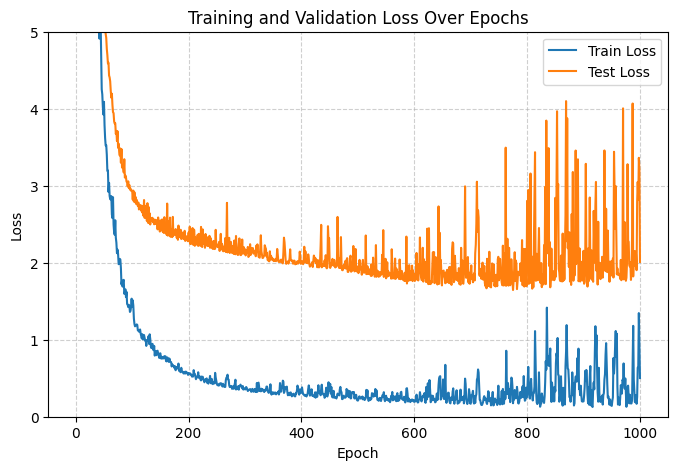

In [180]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial1.jpg")
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/1000], Train Loss: 21713.0376, Test Loss: 5136.0864
Epoch [2/1000], Train Loss: 1424.3285, Test Loss: 623.6400
Epoch [3/1000], Train Loss: 1648.1725, Test Loss: 2146.8055
Epoch [4/1000], Train Loss: 1337.7243, Test Loss: 303.2288
Epoch [5/1000], Train Loss: 125.1773, Test Loss: 183.3516
Epoch [6/1000], Train Loss: 251.9312, Test Loss: 209.7666
Epoch [7/1000], Train Loss: 98.1126, Test Loss: 26.9623
Epoch [8/1000], Train Loss: 43.1838, Test Loss: 58.9656
Epoch [9/1000], Train Loss: 43.1974, Test Loss: 22.8761
Epoch [10/1000], Train Loss: 21.8348, Test Loss: 24.8009
Epoch [11/1000], Train Loss: 22.2070, Test Loss: 18.0472
Epoch [12/1000], Train Loss: 15.8902, Test Loss: 16.2311
Epoch [13/1000], Train Loss: 14.4365, Test Loss: 14.6834
Epoch [14/1000], Train Loss: 13.2652, Test Loss: 13.8982
Epoch [15/1000], Train Loss: 12.2662, Test Loss: 13.0892
Epoch [16/1000], Train Loss: 11.1313, Test Loss: 12.5163
Epoch [17/1000], Train Loss: 10.8116, Test Loss: 12.0985
Epoch [18/1000], Trai

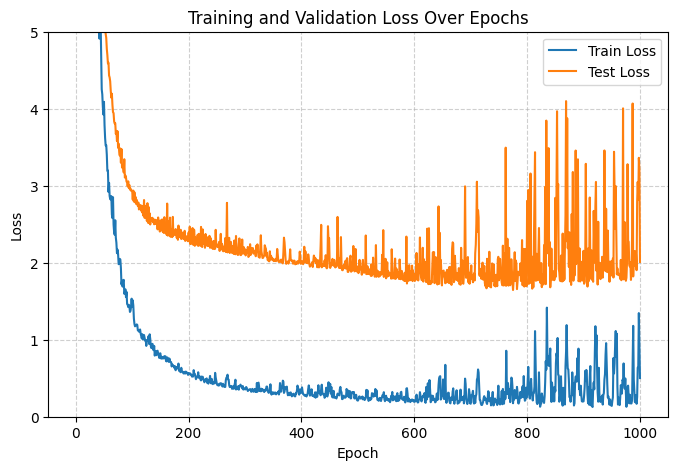

In [176]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[64, 64], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 1000  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [177]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.4049


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


In [178]:
avg_logkd = labels.mean()

In [179]:
avg_test_rmse / avg_logkd * 100

tensor(16.5791, device='cuda:0')

#### Experiment 2

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/500], Train Loss: 854.9472, Test Loss: 544.0575
Epoch [2/500], Train Loss: 253.4072, Test Loss: 229.4391
Epoch [3/500], Train Loss: 109.4448, Test Loss: 82.1325
Epoch [4/500], Train Loss: 47.1850, Test Loss: 15.3252
Epoch [5/500], Train Loss: 21.2242, Test Loss: 4.6577
Epoch [6/500], Train Loss: 13.1814, Test Loss: 3.9590
Epoch [7/500], Train Loss: 9.2857, Test Loss: 3.8327
Epoch [8/500], Train Loss: 7.5426, Test Loss: 3.6366
Epoch [9/500], Train Loss: 5.0724, Test Loss: 3.7679
Epoch [10/500], Train Loss: 4.0347, Test Loss: 3.8317
Epoch [11/500], Train Loss: 3.8212, Test Loss: 3.8859
Epoch [12/500], Train Loss: 3.2130, Test Loss: 3.6194
Epoch [13/500], Train Loss: 3.2526, Test Loss: 3.5227
Epoch [14/500], Train Loss: 3.0033, Test Loss: 3.4196
Epoch [15/500], Train Loss: 2.9275, Test Loss: 3.6784
Epoch [16/500], Train Loss: 2.8213, Test Loss: 3.4466
Epoch [17/500], Train Loss: 2.8651, Test Loss: 3.3152
Epoch [18/500], Train Loss: 2.6607, Test Loss: 3.3628
Epoch [19/500], Train 

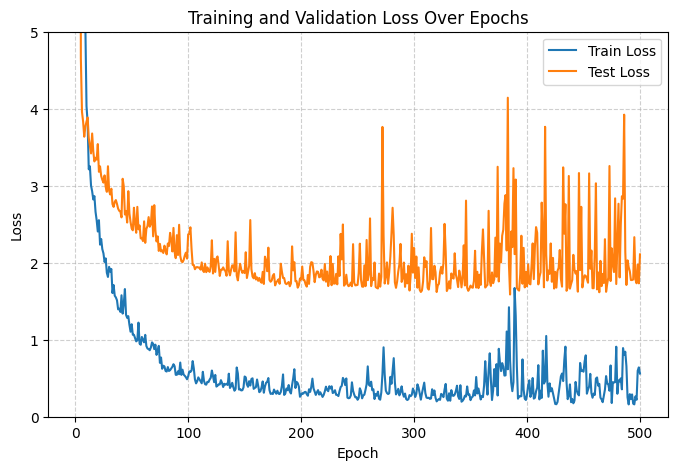

In [181]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[64, 64], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 500  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial2.jpg")
plt.show()

In [182]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.4457


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


#### Trial 3

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/500], Train Loss: 1421.5259, Test Loss: 989.7973
Epoch [2/500], Train Loss: 622.7313, Test Loss: 49.2266
Epoch [3/500], Train Loss: 213.5837, Test Loss: 149.6003
Epoch [4/500], Train Loss: 67.7463, Test Loss: 88.9934
Epoch [5/500], Train Loss: 48.4369, Test Loss: 19.2001
Epoch [6/500], Train Loss: 22.6923, Test Loss: 6.7986
Epoch [7/500], Train Loss: 11.5769, Test Loss: 7.6696
Epoch [8/500], Train Loss: 6.3722, Test Loss: 11.0516
Epoch [9/500], Train Loss: 5.1767, Test Loss: 6.0983
Epoch [10/500], Train Loss: 4.6706, Test Loss: 6.9310
Epoch [11/500], Train Loss: 4.1872, Test Loss: 5.1074
Epoch [12/500], Train Loss: 3.9828, Test Loss: 5.5405
Epoch [13/500], Train Loss: 3.7225, Test Loss: 4.8754
Epoch [14/500], Train Loss: 3.5137, Test Loss: 5.0939
Epoch [15/500], Train Loss: 3.8230, Test Loss: 4.6873
Epoch [16/500], Train Loss: 3.1649, Test Loss: 4.8170
Epoch [17/500], Train Loss: 3.4011, Test Loss: 4.5825
Epoch [18/500], Train Loss: 3.1222, Test Loss: 4.6284
Epoch [19/500], Tr

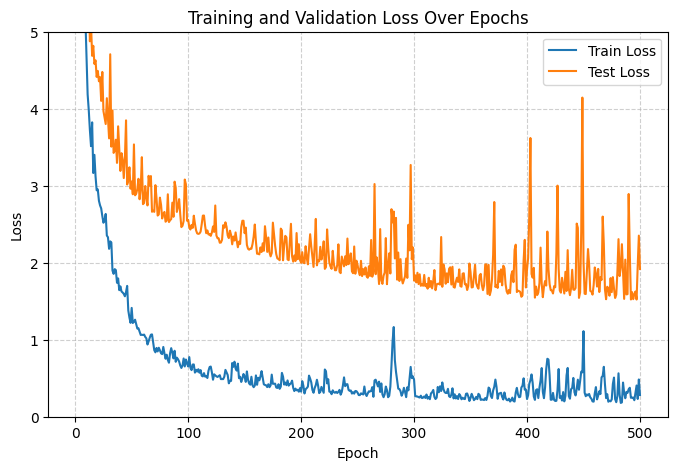

In [183]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[32, 32], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 500  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial2.jpg")
plt.show()

In [184]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.3790


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


#### Trial 4

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/250], Train Loss: 1057.2837, Test Loss: 822.0674
Epoch [2/250], Train Loss: 356.3018, Test Loss: 257.1516
Epoch [3/250], Train Loss: 206.0168, Test Loss: 52.0867
Epoch [4/250], Train Loss: 71.2742, Test Loss: 24.7267
Epoch [5/250], Train Loss: 29.6497, Test Loss: 18.9589
Epoch [6/250], Train Loss: 12.6277, Test Loss: 14.6512
Epoch [7/250], Train Loss: 10.2865, Test Loss: 10.5984
Epoch [8/250], Train Loss: 7.7375, Test Loss: 7.3205
Epoch [9/250], Train Loss: 6.6367, Test Loss: 5.8541
Epoch [10/250], Train Loss: 4.8874, Test Loss: 5.5521
Epoch [11/250], Train Loss: 5.2789, Test Loss: 5.2899
Epoch [12/250], Train Loss: 4.6850, Test Loss: 5.0819
Epoch [13/250], Train Loss: 4.3940, Test Loss: 4.7653
Epoch [14/250], Train Loss: 4.1381, Test Loss: 4.6199
Epoch [15/250], Train Loss: 3.9744, Test Loss: 4.4176
Epoch [16/250], Train Loss: 3.6154, Test Loss: 4.2970
Epoch [17/250], Train Loss: 3.6556, Test Loss: 4.6323
Epoch [18/250], Train Loss: 3.7377, Test Loss: 4.5915
Epoch [19/250], T

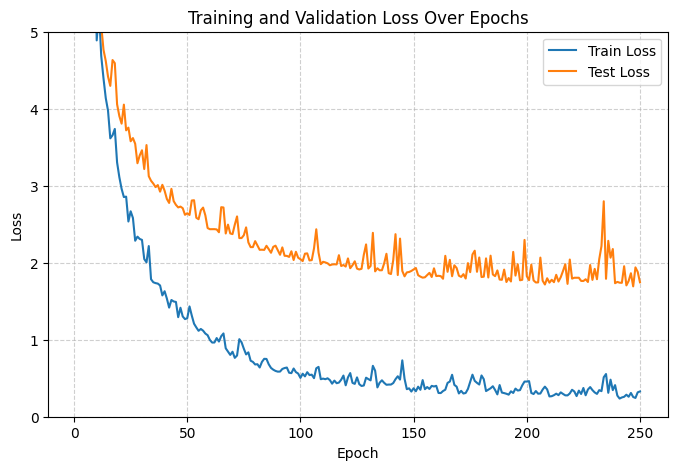

In [185]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[32, 32], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 250  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial2.jpg")
plt.show()

In [186]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.3129


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


#### Trial 5

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/250], Train Loss: 965.2699, Test Loss: 797.2278
Epoch [2/250], Train Loss: 310.1205, Test Loss: 169.6213
Epoch [3/250], Train Loss: 167.0621, Test Loss: 10.0418
Epoch [4/250], Train Loss: 51.3603, Test Loss: 25.3646
Epoch [5/250], Train Loss: 23.4952, Test Loss: 34.9532
Epoch [6/250], Train Loss: 14.8959, Test Loss: 15.5070
Epoch [7/250], Train Loss: 10.4530, Test Loss: 14.3243
Epoch [8/250], Train Loss: 8.2558, Test Loss: 7.4702
Epoch [9/250], Train Loss: 6.5188, Test Loss: 7.9290
Epoch [10/250], Train Loss: 5.7475, Test Loss: 6.2470
Epoch [11/250], Train Loss: 5.2883, Test Loss: 6.5030
Epoch [12/250], Train Loss: 5.0333, Test Loss: 5.7342
Epoch [13/250], Train Loss: 4.7077, Test Loss: 6.2836
Epoch [14/250], Train Loss: 4.8239, Test Loss: 5.3356
Epoch [15/250], Train Loss: 4.3282, Test Loss: 5.9597
Epoch [16/250], Train Loss: 4.2149, Test Loss: 4.9694
Epoch [17/250], Train Loss: 4.1162, Test Loss: 5.0975
Epoch [18/250], Train Loss: 3.7682, Test Loss: 4.7449
Epoch [19/250], Tr

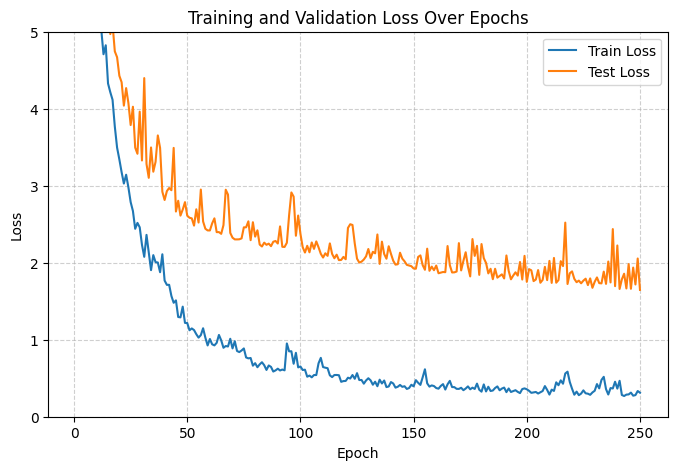

In [187]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[16, 16], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 250  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial2.jpg")
plt.show()

In [188]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.2735


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


#### Trial 6

C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


Epoch [1/250], Train Loss: 483.9374, Test Loss: 207.3883
Epoch [2/250], Train Loss: 125.6020, Test Loss: 133.9454
Epoch [3/250], Train Loss: 52.3435, Test Loss: 55.0814
Epoch [4/250], Train Loss: 26.7419, Test Loss: 34.0487
Epoch [5/250], Train Loss: 13.6257, Test Loss: 11.4495
Epoch [6/250], Train Loss: 6.4495, Test Loss: 9.5085
Epoch [7/250], Train Loss: 5.1119, Test Loss: 3.8035
Epoch [8/250], Train Loss: 3.4742, Test Loss: 3.5608
Epoch [9/250], Train Loss: 2.5204, Test Loss: 3.3912
Epoch [10/250], Train Loss: 2.3183, Test Loss: 3.3206
Epoch [11/250], Train Loss: 2.4285, Test Loss: 3.5374
Epoch [12/250], Train Loss: 2.1998, Test Loss: 3.2945
Epoch [13/250], Train Loss: 2.2054, Test Loss: 2.9961
Epoch [14/250], Train Loss: 2.1980, Test Loss: 3.5697
Epoch [15/250], Train Loss: 2.0548, Test Loss: 2.8452
Epoch [16/250], Train Loss: 1.9206, Test Loss: 2.8410
Epoch [17/250], Train Loss: 1.9242, Test Loss: 3.7164
Epoch [18/250], Train Loss: 1.8895, Test Loss: 2.7906
Epoch [19/250], Train L

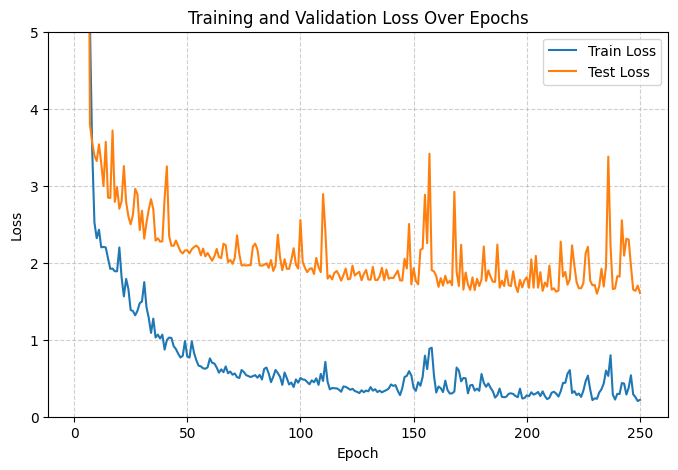

In [189]:
import matplotlib.pyplot as plt

# Initialize the model
model = GCNModel(ndim=30, hidden_dims=[8, 8], ntab=data[2].shape[1])  # Example dimensions

model.to(device)

# Example loss and optimizer
loss_fn = nn.MSELoss()  # or BCEWithLogitsLoss if classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


train_losses = []
test_losses = []

num_epochs = 250  # You can adjust

# Start timer
start_time = time.time()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0

    for batch in trainLoader:
        protein_graph, ligand_graph, tabular_data, labels = batch

        # Move everything to device
        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model((protein_graph, ligand_graph, tabular_data, labels))

        # Compute loss
        loss = loss_fn(outputs.squeeze(), labels.squeeze())

        # Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(trainLoader)
    train_losses.append(train_loss)  # <-- Track train loss

    # ---------------- Evaluate on Test Set ----------------
    model.eval()
    test_loss = 0

    with torch.no_grad():
        for batch in testLoader:
            protein_graph, ligand_graph, tabular_data, labels = batch

            protein_graph = protein_graph.to(device)
            ligand_graph = ligand_graph.to(device)
            tabular_data = tabular_data.to(device)
            labels = labels.to(device)

            outputs = model((protein_graph, ligand_graph, tabular_data, labels))
            loss = loss_fn(outputs.squeeze(), labels.squeeze())

            test_loss += loss.item()

    test_loss /= len(testLoader)
    test_losses.append(test_loss)  # <-- Track test loss

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# ------------------ After Training: Plot losses ------------------
# Stop timer
end_time = time.time()

# Total training time
total_time = end_time - start_time
print(f"\nTotal Training Time: {total_time:.2f} seconds")

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 5)
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("trial2.jpg")
plt.show()

In [190]:
import torch.nn.functional as F

# After training is done, calculate RMSE on the test set (validation data)
model.eval()  # Set the model to evaluation mode
test_rmse = 0.0

with torch.no_grad():  # No gradients required for validation
    for batch in testLoader:  # <- probably "testLoader" not "val_loader" if you called it that
        protein_graph, ligand_graph, tabular_data, labels = batch

        protein_graph = protein_graph.to(device)
        ligand_graph = ligand_graph.to(device)
        tabular_data = tabular_data.to(device)
        labels = labels.to(device)

        out = model((protein_graph, ligand_graph, tabular_data, labels))  # Forward pass

        # Compute RMSE on the validation set
        rmse = torch.sqrt(F.mse_loss(out.squeeze(), labels.squeeze()))  # Compute RMSE
        test_rmse += rmse.item()  # Accumulate the RMSE for this batch

# Average RMSE on the test set
avg_test_rmse = test_rmse / len(testLoader)

print(f"Test RMSE: {avg_test_rmse:.4f}")

Test RMSE: 1.2539


C:\Users\vivek\AppData\Local\Temp\ipykernel_24468\3914452561.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.protein_graphs[idx], self.ligand_graphs[idx], torch.tensor(self.tabular_data.iloc[idx], dtype=torch.float32), torch.tensor(self.labels.iloc[idx], dtype=torch.float32)


In [192]:
avg_test_rmse / avg_logkd * 100

tensor(14.7977, device='cuda:0')

In [193]:
#### Good enough for this